# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [98]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']



### Now take a look at the shapes of the X and y matricies 

In [99]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [100]:
number = y.loc[36000:]

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

In [101]:
import matplotlib.pyplot as plt
import matplotlib

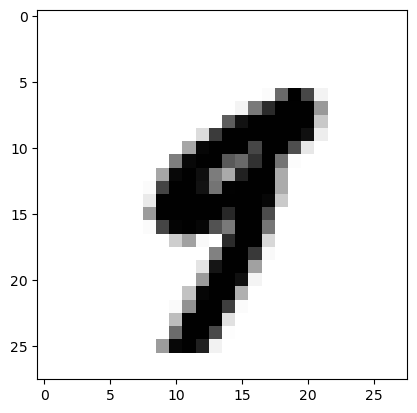

In [102]:
# assuming the number is stored in a variable called “number”
number_reshaped = X.iloc[36000,:].values.reshape(28,28)
plt.imshow(number_reshaped, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.show()

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [103]:
number = y.loc[36000:36000]
number

36000    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [104]:

X_train = X.loc[0:60000]
y_train = y.loc[0:60000]
X_test = X.loc[60001:]
y_test = y.loc[60001:]

0        5
1        0
2        4
3        1
4        9
        ..
59996    3
59997    5
59998    6
59999    8
60000    7
Name: class, Length: 60001, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [105]:
y5_train = np.where(y_train == '5', 1, 0)
y5_test = np.where(y_test == '5',1, 0)



### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.metrics import plot_confusion_matrix


log_model = LogisticRegression() 


## Data splitting
trans=PowerTransformer()
trans.fit(X_train)
X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y5_train)

/Users/jon/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/jon/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Does the classifier predict correctly the 36000th digit we picked before?

In [115]:
y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

y_pred_train_log[36000]

0

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [114]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [119]:
never_5_clf.fit(X_train_mod, y5_train )
y_pred_train_log_n5 = never_5_clf.predict(X_train_mod)
y_pred_test_log_n5 = never_5_clf.predict(X_test_mod)

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [131]:
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y5_train, y_pred_train_log),
                                         precision_score(y5_train, y_pred_train_log),
                                         recall_score(y5_train, y_pred_train_log)],
                               'Test': [accuracy_score(y5_test, y_pred_test_log),
                                        precision_score(y5_test, y_pred_test_log),
                                        recall_score(y5_test, y_pred_test_log)]})

display(performance_log)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y5_train, y_pred_train_log_n5),
                                         precision_score(y5_train, y_pred_train_log_n5),
                                         recall_score(y5_train, y_pred_train_log_n5)],
                               'Test': [accuracy_score(y5_test, y_pred_test_log_n5),
                                        precision_score(y5_test, y_pred_test_log_n5),
                                        recall_score(y5_test, y_pred_test_log_n5)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.975317,0.975498
1,Precision,0.907025,0.914213
2,Recall,0.809814,0.800448


/Users/jon/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jon/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Error_metric,Train,Test
0,Accuracy,0.909652,0.910791
1,Precision,0.000000,0.000000
2,Recall,0.000000,0.000000


/Users/jon/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


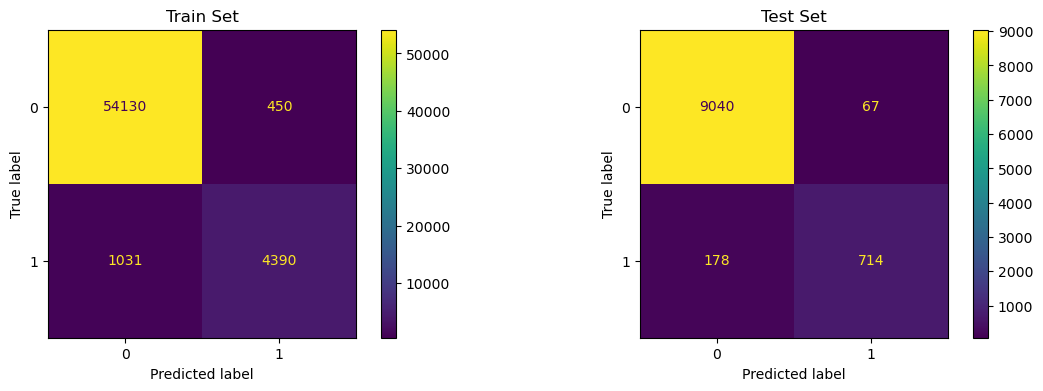

In [124]:

fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(log_model,X_train_mod,y5_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(log_model,X_test_mod,y5_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")


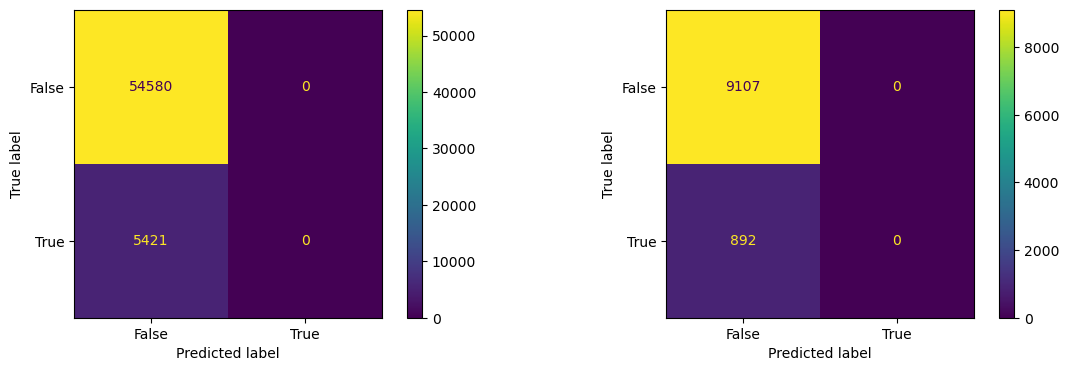

In [133]:
# plotting confusion matrix for classifier we made ourselves. 
from sklearn import metrics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,4))
confusion_matrix_train = metrics.confusion_matrix(y5_train, y_pred_train_log_n5)
cm_display_train = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_train, display_labels = [False, True]).plot(ax = ax1)
confusion_matrix_test = metrics.confusion_matrix(y5_test, y_pred_test_log_n5)
cm_display_test = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_test, display_labels = [False, True]).plot(ax = ax2)

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
#For the dumb classifier model both the recall and precision scores are 0. Meaning that we have failed to identify any of the True Positives or False positives. 
#The accuracy is still quite high but only because 90% of the data gives a false answer anyway. So we are right by chance 90% of the time.

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

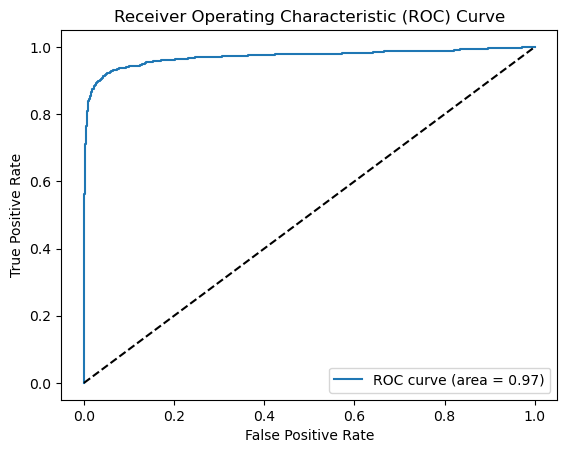

In [135]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the test set
probs = log_model.predict_proba(X_test_mod)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y5_test, probs)

# Compute the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

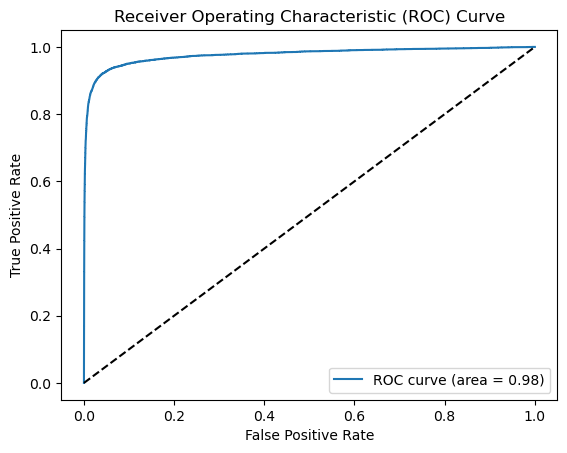

In [138]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the test set
probs2 = log_model.predict_proba(X_train_mod)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr2, tpr2, thresholds2 = roc_curve(y5_train, probs2)

# Compute the Area Under the Curve (AUC)
roc_auc2 = auc(fpr2, tpr2)

# Plot the ROC curve
plt.plot(fpr2, tpr2, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

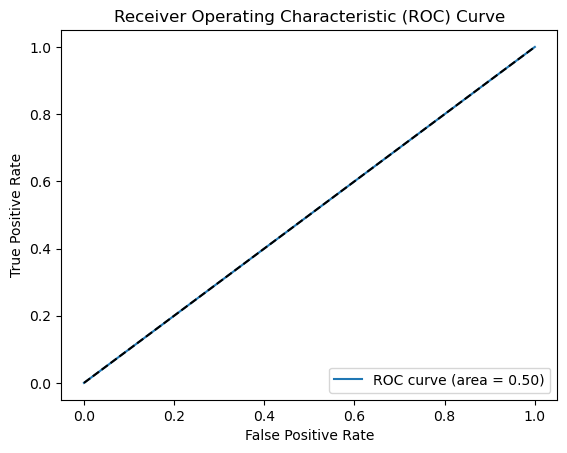

In [140]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the test set
#probs3 = never_5_clf.predict_proba(X_test_mod)[:, 1] #'Never5Classifier' object has no attribute 'predict_proba'

# Compute the false positive rate, true positive rate, and thresholds
fpr3, tpr3, thresholds3 = roc_curve(y5_test, y_pred_test_log_n5) #Replace probs3 with y predict values

# Compute the Area Under the Curve (AUC)
roc_auc3 = auc(fpr3, tpr3)

# Plot the ROC curve
plt.plot(fpr3, tpr3, label='ROC curve (area = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

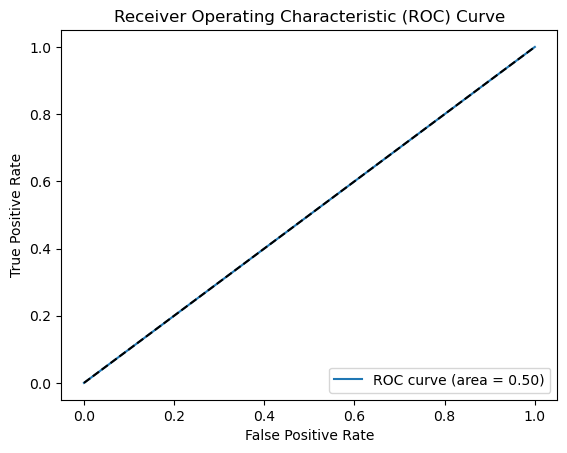

In [141]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the test set
#probs3 = never_5_clf.predict_proba(X_test_mod)[:, 1] #'Never5Classifier' object has no attribute 'predict_proba'

# Compute the false positive rate, true positive rate, and thresholds
fpr4, tpr4, thresholds4 = roc_curve(y5_train, y_pred_train_log_n5) #Replace probs3 with y predict values

# Compute the Area Under the Curve (AUC)
roc_auc4 = auc(fpr4, tpr4)

# Plot the ROC curve
plt.plot(fpr4, tpr4, label='ROC curve (area = %0.2f)' % roc_auc4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Now find the roc_auc_score for each. 

In [143]:
print("roc_auc_score for log_model test set:", roc_auc)
print("roc_auc_score for log_model training set:", roc_auc2)
print("roc_auc_score for dumb classifer test set:", roc_auc3)
print("roc_auc_score for dumb classifer training set:", roc_auc4)


roc_auc_score for log_model test set: 0.9765454282569942
roc_auc_score for log_model training set: 0.9765454282569942
roc_auc_score for dumb classifer test set: 0.5
roc_auc_score for dumb classifer training set: 0.5


### What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
#This tells us that the log.model logistic regression works better as a classifier than the dumb classifier that never predicted 5s